# Shape Detection

[Shape detection](https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/)

In [1]:
import os
os.environ["OPENBLAS_CORETYPE"] ="Skylake"
os.getenv("OPENBLAS_CORETYPE")

import numpy as np
import cv2
from PIL import Image

In [3]:
def detect(c):
	# initialize the shape name and approximate the contour
	shape = "unidentified"
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.04 * peri, True)
	# if the shape is a triangle, it will have 3 vertices
	if len(approx) == 3:
		shape = "triangle"
	# if the shape has 4 vertices, it is either a square or
	# a rectangle
	elif len(approx) == 4:
		# compute the bounding box of the contour and use the
		# bounding box to compute the aspect ratio
		(x, y, w, h) = cv2.boundingRect(approx)
		ar = w / float(h)
			# a square will have an aspect ratio that is approximately
		# equal to one, otherwise, the shape is a rectangle
		shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
	elif len(approx) == 5:
		shape = "pentagon"
		# otherwise, we assume the shape is a circle
	else:
		shape = "circle"
		# return the name of the shape
	return shape

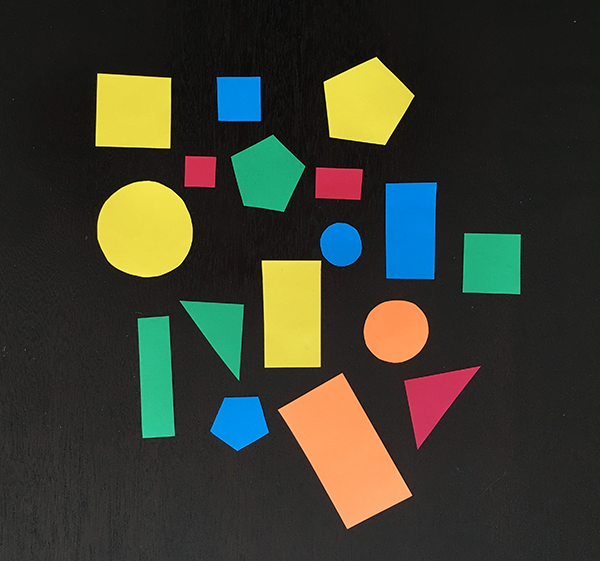

In [5]:
image = cv2.imread('img/shape/shapes_and_colors.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Image.fromarray(image)